<h1>PHY 2200 - Computational Physics</h1>
<h2>Spring 2023</h2>

<h2>Unit 3 Project - Universality in discrete maps</h2>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Introduction

We have already seen hints of universality in the transition to chaos. In both the damped, driven pendulum and the logistic map, a cascade of period doublings occurs. The system transitions from a steady limit to a period-2 oscillation to a period-4 oscillation, and so on, eventually reaching chaotic behavior for a critical parameter value. The ratio of successive widths of these intervals tends to a constant $\delta$ which is independent of the model details. If $r_{n}$ is the parameter value at which the period-$n$ cycle begins, then

$$\delta = \lim_{n\rightarrow \infty}\frac{r_{n}-r_{n-1}}{r_{n+1}-r_{n}} = 4.6692016...$$

That this constant appears in wildly different systems suggests it is indicative of some deep truth about chaos. However, one only expects this particular value for a certain <i>class</i> of systems. In the context of discrete, return maps (e.g., $x_{n+1} = f(x_{n})$) it appears for any system in which the function $f(x)$ has a <b>quadratic maximum</b>. We explored two such maps: $x_{n+1} = rx_{n}(1-x_{n})$ and $x_{n+1} = a-x_{n}^{2}$ and found that both yielded the same value for this quantity $\delta$. In this project, you'll consider two different maps:

<b>Cubic map</b> ($0\leq r \leq 3$)
$$x_{n+1} = rx_{n}-x_{n}^{3}$$

<b>Quartic map</b> ($0 \leq a \leq 2$)
$$x_{n+1} = 1-ax_{n}^{4}$$

One of these maps will yield the familiar value of $\delta = 4.669...$ while the other will result in a different value. Your ultimate task is to compute $\delta$ for each model.

### (i) Cubic map

Complete the function below to perform one iteration of the cubic map described above.

In [2]:
def map1(x,r):
    return r*x-x**3

In [3]:
'''case1'''
assert np.isclose(map1(.5,1),0.375 ,atol=1e-5).all()
'''case2'''
assert np.isclose(map1(.25,21),5.234375 ,atol=1e-5).all()

Now think back to what you did to compute a bifurcation diagram for the logistic map. Complete the function below to return $N$ iterations of the cubic map after running the map $N_{eq}$ times to reach the steady state.

In [4]:
def map1samples(xo,r,N,Neq):
    for i in range(0,Neq):
        xo = map1(xo,r)
        
    x = np.zeros(N)
    x[0] = xo
    
    for i in range(0,N-1):
        x[i+1] = map1(x[i],r)
    
    return x

Next, follow your analysis for the logistic map to compute a list of $N$ values which will be stored for each of $N_{r}$ values of the parameter $r$ in the range $0\leq r \leq 3$.

This cubic map actually has two branches in its bifurcation diagram. To access both, you'll need to store <i>two</i> sets of values: one with $x_{0} = 0.1$ and the other with $x_{0} = -0.1$. The two branches can be plotted on the same graph using different colors and a sufficiently small marker size.

You could compute both sets at once or just copy and paste the logistic map structure twice. The resulting diagram might take a few minutes to compute, so you can reduce the values of $N$, $N_{r}$, $N_{eq}$ as you work through troubleshooting. The final result should look like the following:

<img src="cubic.png" width=600>

In [49]:
Nr = 10000
rs = np.linspace(0,3,Nr)
Neq = 500
N = 10000

xs1 = np.zeros((N,Nr))
xs2 = np.zeros((N,Nr))

for i in range(0,Nr):
    r = rs[i]
    x = map1samples(.1,r,N,Neq)
    xs1[:,i] = x.transpose()
    
for i in range(0,Nr):
    r = rs[i]
    x = map1samples(-.1,r,N,Neq)
    xs2[:,i] = x.transpose()

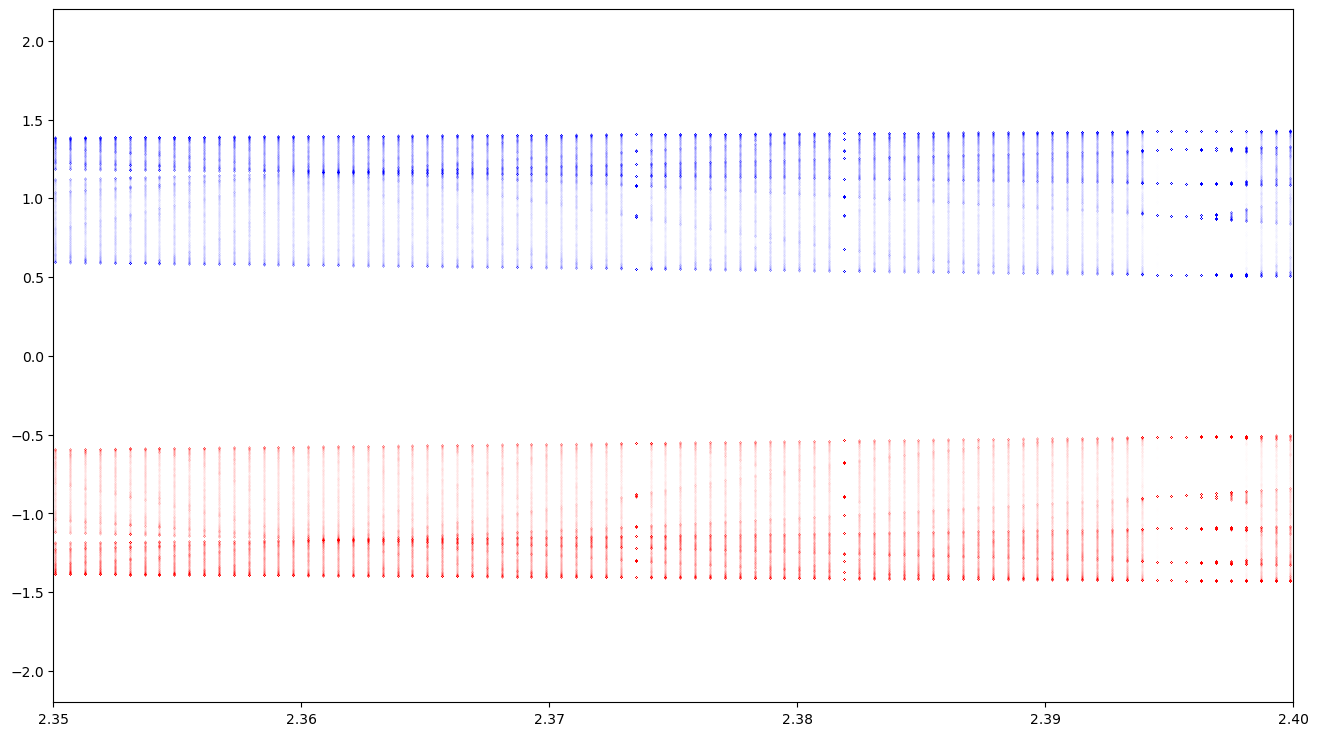

In [46]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)

plt.plot(rs.transpose(),xs1.transpose(),'b.',markersize=0.005)
plt.plot(rs.transpose(),xs2.transpose(),'r.',markersize=0.005)
plt.xlim(2.35,2.4)
#plt.ylim(.5,1.5)
plt.show()

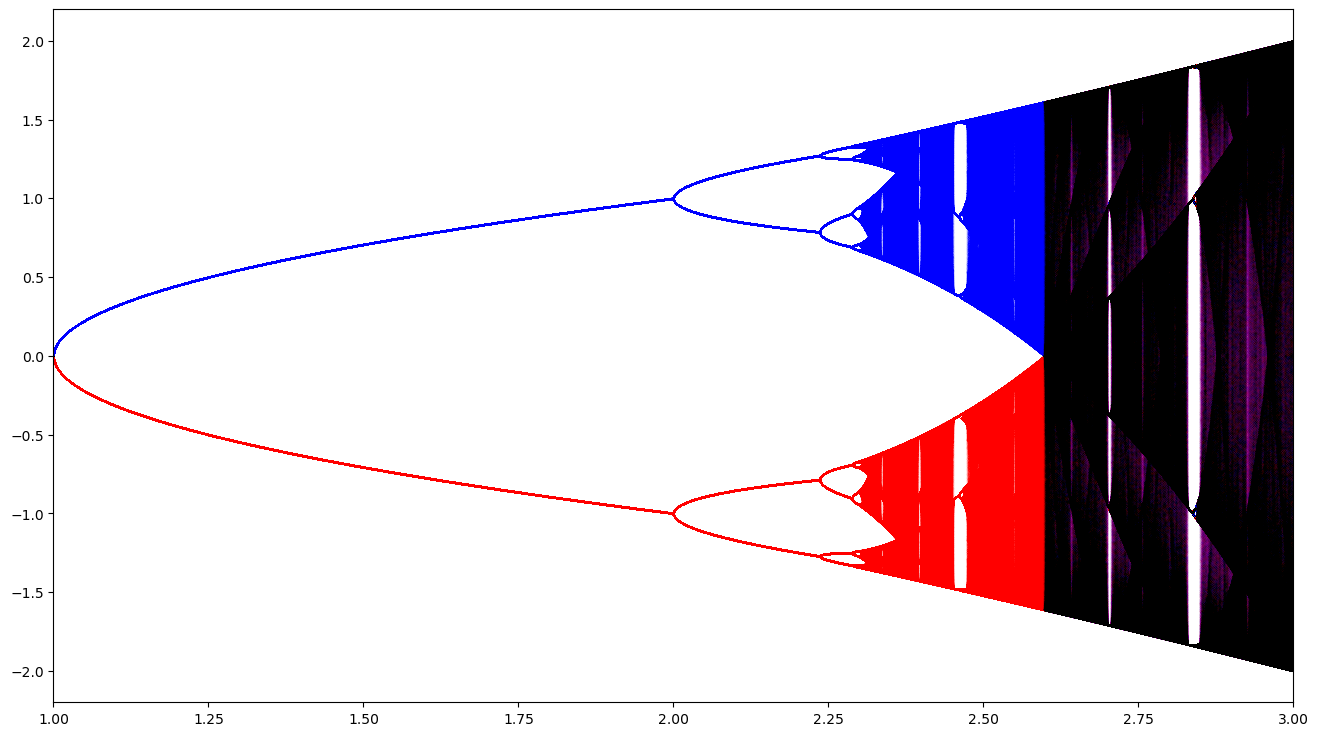

In [6]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)

plt.plot(rs.transpose(),xs1.transpose(),'b.',markersize=0.005)
plt.plot(rs.transpose(),xs2.transpose(),'r.',markersize=0.005)
plt.xlim(1,3)
plt.show()

Once your bifurcation diagram gives you confidence that you have computed the map correctly, obtain the Feigenbaum constant $\delta$ for this map. We covered two ways to accomplish this for the logistic/Hénon maps. You can use either method, but the Lyapunov exponent might be easier to work with.

<b>You only need to work with one (say the positive) branch to do this. That is, take $x_{0} = 0.1$ and only look at the behavior on this branch.</b>

Whatever you do, explain your method in words (using Markdown) in the following cell. Copy and paste (and <i>modify</i>) any portions from previous class activities, but explain where any copied routines came from. 

I would suggest working out where the period doublings (or minima of the Lyapunov exponent). Obtain a list of these particular values of $r$, and then compute successive approximations to $\delta$. Leave evidence (for example, a cell which results in a plot) showing how each value was computed. Once your basic method works, you just have to copy and paste this cell (or set of cells) and adjust bounds for each successive value of $r$.

Finally, compute successive approximations for $\delta$. How many, you say? I claim that the value you obtain will <i>either</i> be $4.669...$ <i>or</i> one of the values listed in the table [here](https://mathworld.wolfram.com/FeigenbaumConstant.html). This reference uses $r$ to refer to the degree of the polynomial describing the mapping function at the maximum rather than the parameter $r$. The table roughly halfway through that page gives a list of exponents $r = 3,4,...$ and then expected values for $\delta$ and $\alpha$ (the second Feigenbaum constant we have not worked with). 

You should go far enough to compute $\delta$ accurately to three significant figures (e.g., $4.66$, $8.35$, etc.). If you struggle to obtain this accuracy after several approximations, try keeping more decimal places in your values of $r$ (where the Lyapunov exponent dips or where the period doublings occur). You might not need to go this far, but you can get the critical values of $r$ to 8-12 decimal places straightforwardly.

<b>Explanation:</b>
    
Edit this cell to explain what you did.

In [ ]:
# copy and paste what you need to perform the calculation; add as many new cells as you need.

# sample size -> N, Nr, Neq
# r -> calculated based on the sample size
# starting value -> xo (.1 and -.1 in the last case)

In [ ]:
# make a table or list of your critical values of r here; for full credit make a Markdown table as employed
# in previous notebooks

n | change in period | $r_n$ 
--- | --- | ---
1 | transition: $1 \to 2$ | 1.9973
2 | transition: $2 \to 4$ | 2.28499
3 | transition: $4 \to 8$ | 2.29595
4 | transition: $8 \to 16$ | 2.235158

In [42]:
# compute δ here and print all approximations, ending with one which is accurate to within three significant 
# figures

def feigenbaum(x):
    δ = np.zeros(np.size(x))
    for i in range(1,np.size(x)-1):
        δ[i] = (x[i]-x[i-1])/(x[i+1]-x[i])
    δ2 = δ[1]
    δ3 = δ[2]
    
    return δ2, δ3
    
print(feigenbaum([1.9973,2.235158,2.28499,2.29595]))

(4.773197945095535, 4.546715328467201)


<b>Final question on cubic map:</b> The logistic and Hénon maps supported period-3 cycles in which (after reaching steady state), $x$ bounces between exactly <i>three</i> values. There is actually a rigorous [theorem]() which proves that if a period-3 cycle exists, then there is a period-$n$ window for <i>any</i> integer $n$. 

Find a period-3 window for the cubic map or explain how you know that it doesn't exist. You might find it helpful to look at the bifurcation diagram to get a rough idea of where it appears (if it does). I will promise you that if it exists, it would be visible on the image given to you above.

If you can find a period-3 window, run the map for several hundred iterations and plot the results in a way that clearly shows the oscillation between three points. If you don't see an appropriate window on the bifurcation diagram, explain what about having two branches on the bifurcation diagram prevents this cycle from occuring.

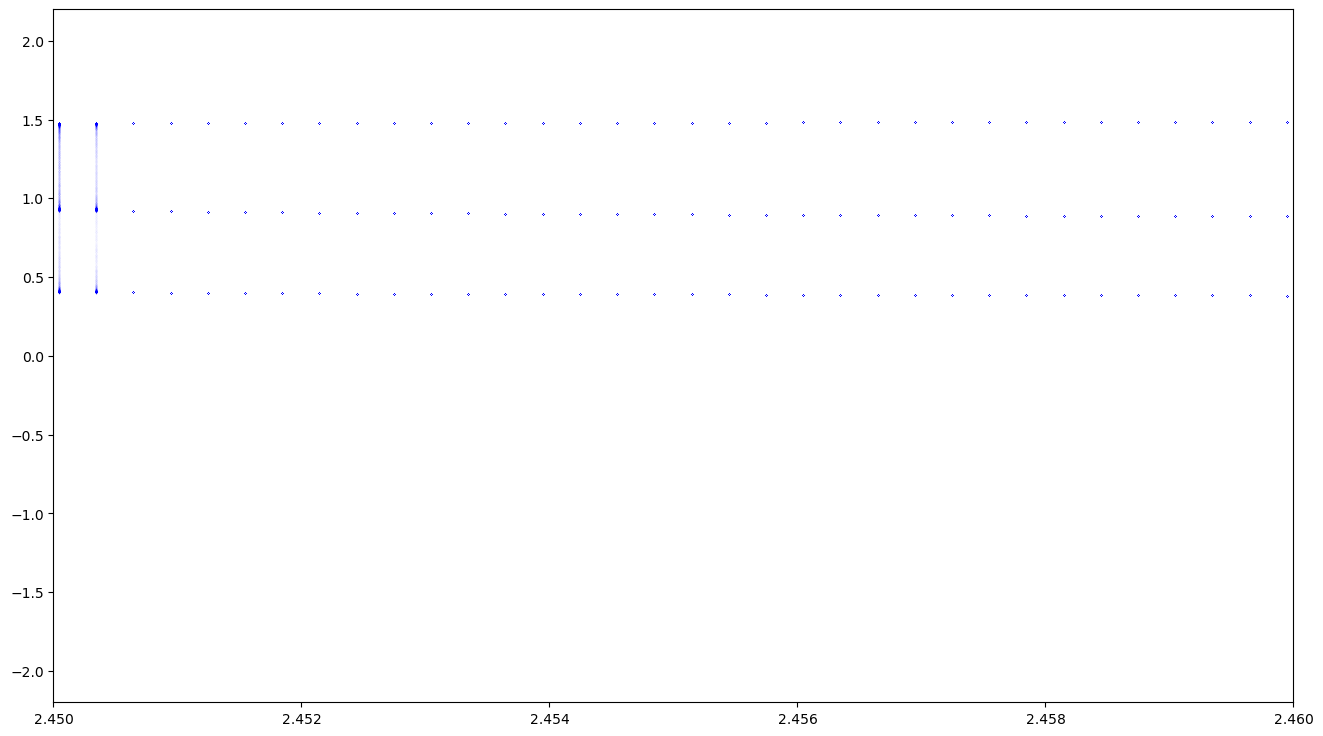

In [51]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)

plt.plot(rs.transpose(),xs1.transpose(),'b.',markersize=0.005)
plt.xlim(2.45,2.46)
plt.show()

In [ ]:
# use Markdown/code here to answer question; feel free to add more cells if needed

There appears to be a period-3 window in this bifurcation. As you can see in the graph above, it oscillates between three values (roughly 1.5, .9, and .4). 

### (i) Quartic map

Complete the function below to perform one iteration of the quartic map described above.

In [60]:
def map2(x,a):
    return 1-a*x**4

In [10]:
'''case1'''
assert np.isclose(map2(.5,1),0.9375 ,atol=1e-5).all()
'''case2'''
assert np.isclose(map2(.25,21),0.91796875 ,atol=1e-5).all()

Complete the following function to return $N$ samples (identically to how the function above for the cubic map works).

In [58]:
def map2samples(xo,a,N,Neq):
    for i in range(0,Neq):
        xo = map2(xo,r)
        
    x = np.zeros(N)
    x[0] = xo
    
    for i in range(0,N-1):
        x[i+1] = map2(x[i],r)
    
    return x

Now create a bifurcation diagram for the quartic map on the range $0\leq a \leq 2$. There is only one branch in this map, so you can create a single array to store the $x$ values using $x_{0} = 0.1$.

In [61]:
Na = 10000
rs = np.linspace(0,2,Na)
Neq = 500
N = 10000

xs = np.zeros((N,Na))

for i in range(0,Na):
    r = rs[i]
    x = map2samples(.1,r,N,Neq)
    xs[:,i] = x.transpose()

#raise NotImplementedError()

Now copy/paste/modify as much as you need to compute the Feigenbaum $\delta$ constant for this map. The instructions are identical to those for the logistic map: show work required to compute critical values of $a$ (at period doublings or where the Lyapunov exponent dips), and compute $\delta$. As before, it will either be the usual 4.669... or one of the values in the table midway through [this](https://mathworld.wolfram.com/FeigenbaumConstant.html) reference.

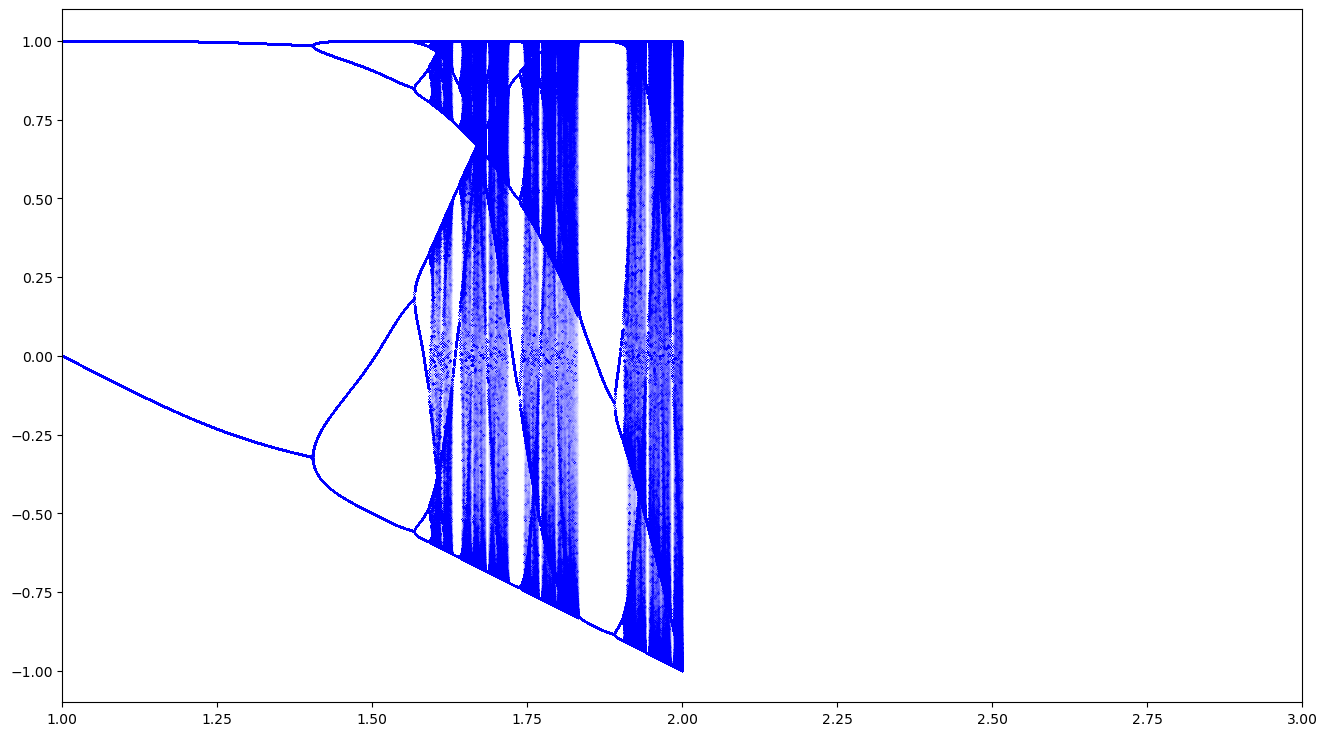

In [62]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)

plt.plot(rs.transpose(),xs.transpose(),'b.',markersize=0.005)
plt.xlim(1,3)
plt.show()

n | change in period | $r_n$ 
--- | --- | ---
1 | transition: $1 \to 2$ | 0.47244
2 | transition: $2 \to 4$ | 1.34689
3 | transition: $4 \to 8$ | 1.53401
4 | transition: $8 \to 16$ | 1.57389

In [52]:
def feigenbaum(x):
    δ = np.zeros(np.size(x))
    for i in range(1,np.size(x)-1):
        δ[i] = (x[i]-x[i-1])/(x[i+1]-x[i])
    δ2 = δ[1]
    δ3 = δ[2]
    
    return δ2, δ3
    
print(feigenbaum([0.47244,1.34689, 1.53401,1.57389]))

(4.6732043608379605, 4.692076228686073)
